# Analyze results

In [5]:
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Now you can import your module
from utils.src import analysis_functions, dataset

# Bootstraping Local recurrence

In [24]:
params = dataset.load_config("/home/tachennf/Documents/delta-rad/1D_radiomics/train_test.yaml")
folder_path = params['paths']['data_folder_path']
outcome_csv = params['paths']['outcome_csv_file']
results_file = "/home/tachennf/Documents/delta-rad/1D_radiomics/0.35T/json_results/train_test_results.json" # MODIFY 
delta_rad_tables = params['paths']['delta_rad_tables']
outcomes_list =  ['one_year_local_control_status'] # MODIFY
feat_sel_algo_list = params['parameters']['feat_sel_algo_list']
pred_algo_list = params['parameters']['pred_algo_list']
nice_tables = ['SIMU', 'F1', 'F3', 'F5', 'Simu_F1', 'Simu_F3', 'Simu_F5', 'F1_F3', 'F1_F5']

results = pd.read_json(results_file)
results_dict = json.load(open(results_file))
print(results_dict.keys())  
print(pred_algo_list)
print(feat_sel_algo_list)

dict_keys(['simu_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'simu_f1_gtv.csv', 'simu_f3_gtv.csv', 'simu_f5_gtv.csv', 'f1_f3_gtv.csv', 'f1_f5_gtv.csv'])
['RF', 'ADABOOST', 'LOGREGRIDGE', 'PSVM', 'KNN', 'BAGG', 'QDA']
['ANOVA_K_BEST', 'RF']


## Compare one algo with different metrics and CI

In [25]:
pred_algo = "RF"
feat_sel_algo = "RF"
outcome = "one_year_local_control_status"
inter_res = results['f3_gtv.csv'][feat_sel_algo][pred_algo][outcome]
#for table in delta_rad_tables: 
for nb_features in inter_res.keys():
    print(nb_features, inter_res[nb_features]['features'])
    print("Train AUC: ", np.mean(inter_res[nb_features]['train_metrics']['auc']['values']))
    print(inter_res[nb_features]['test_metrics']['auc'])
    print("Test AUC: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['auc']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[1]))
    print("Test Brier loss: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['brier_loss']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[1]))
    print("Test sensitivity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['sensitivity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[1]))
    print("Test specificity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['specificity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[1]))
    print('')


1 ['original_glcm_Imc1']
Train AUC:  0.985397512168739
{'values': [0.824793818595949], 'conf_int': [[0.6911956521739131, 0.953840579710144]]}
Test AUC: 0.824793818595949 (0.6911956521739131; 0.953840579710144)
Test Brier loss: 0.168979398261403 (0.083689940966837; 0.26349998789455203)
Test sensitivity: 0.7894736842105261 (0.7894736842105261; 0.7894736842105261)
Test specificity: 0.7894736842105261 (0.7894736842105261; 0.7894736842105261)

2 ['original_glcm_Imc1', 'original_shape_Maximum2DDiameterRow']
Train AUC:  0.9913466738777711
{'values': [0.938165273913184], 'conf_int': [[0.7983059428757651, 1.0]]}
Test AUC: 0.938165273913184 (0.7983059428757651; 1.0)
Test Brier loss: 0.083159969145707 (0.0302942099877; 0.153438507424203)
Test sensitivity: 0.684210526315789 (0.684210526315789; 0.684210526315789)
Test specificity: 1.0 (1.0; 1.0)

3 ['original_glcm_Imc1', 'original_shape_Maximum2DDiameterRow', 'original_glcm_MCC']
Train AUC:  0.9902650081124931
{'values': [0.954615903181898], 'conf_

## Best test AUC
### Display

In [10]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='test_auc', k = 10)
analysis_functions.print_top_results(top_results, metric='test_auc')

Table: simu_gtv.csv
  Mean test_auc: 0.938, Feature Selection Algorithm: RF, Prediction Algorithm: RF, Features: ['original_glcm_Imc1', 'original_shape_Sphericity', 'original_firstorder_Kurtosis'], Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 275, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
  Mean test_auc: 0.927, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Features: ['original_glcm_MCC', 'original_shape_Flatness', 'original_shape_Sphericity'], Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples

### Scatter plot

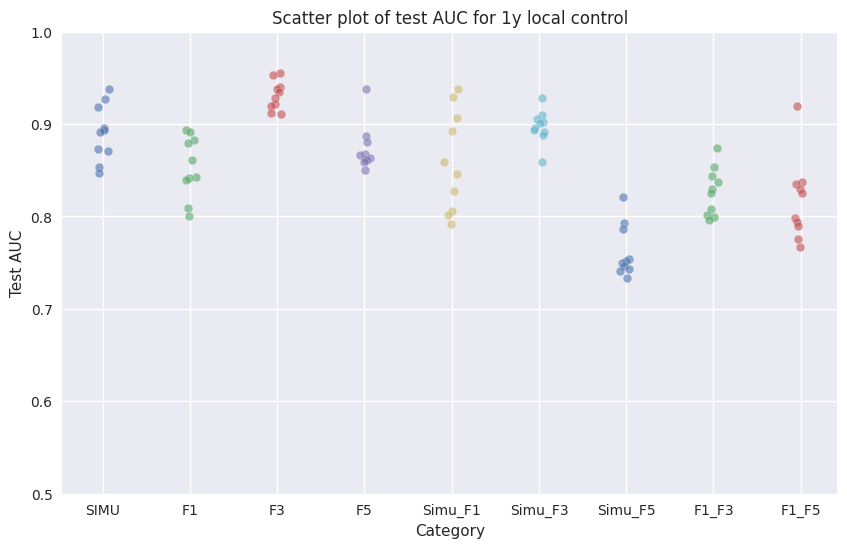

In [11]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
data = analysis_functions.get_top_results_to_plot(top_results)

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of test AUC for 1y local control')
plt.ylim([0.5, 1])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Test AUC')
plt.show()


## Best test brier loss
### Display

In [12]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='test_brier_loss', k = 10)
analysis_functions.print_top_results(top_results, metric='test_brier_loss')

Table: simu_gtv.csv
  Mean test_brier_loss: 0.135, Feature Selection Algorithm: RF, Prediction Algorithm: BAGG, Features: ['original_glcm_Imc1', 'original_shape_Sphericity', 'original_firstorder_Kurtosis'], Parameters: {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 175, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}
  Mean test_brier_loss: 0.137, Feature Selection Algorithm: RF, Prediction Algorithm: RF, Features: ['original_glcm_Imc1', 'original_shape_Sphericity'], Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 675, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose'

### Scatter plot

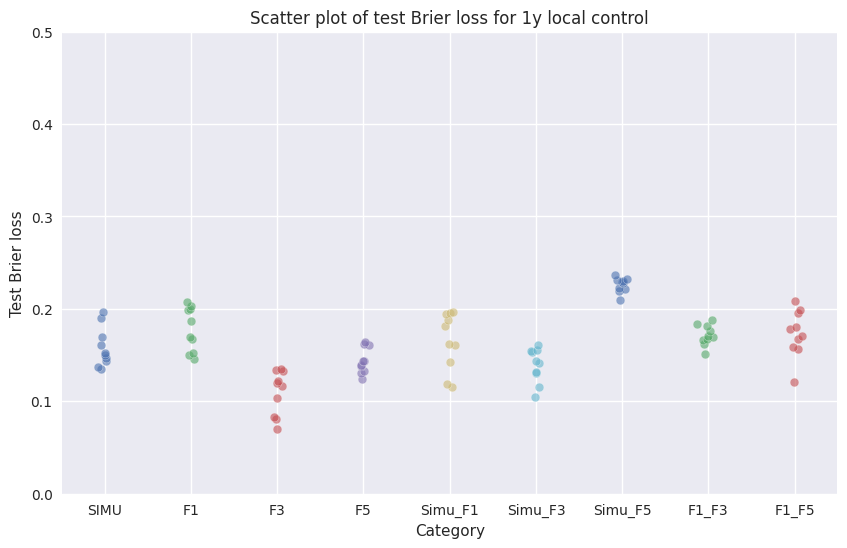

In [13]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
data = analysis_functions.get_top_results_to_plot(top_results)

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of test Brier loss for 1y local control')
plt.ylim([0, 0.5])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Test Brier loss')
plt.show()


## Best spe & sens

In [14]:
analysis_functions.find_perf_alg(results, delta_rad_tables, [outcome], feat_sel_algo_list, pred_algo_list, metric='sens_spec', threshold=0.8)

Table: simu_gtv.csv, Outcome: one_year_local_control_status, Feature Selection Algorithm: RF, Prediction Algorithm: RF, Number of Features: 2, '
'                                           TEST AUC: 0.9179091526035501, Sensitivity: 0.8235294117647061, Specificity: 0.833333333333333, '
'                                           Features: ['original_glcm_Imc1', 'original_shape_Sphericity']
Table: simu_gtv.csv, Outcome: one_year_local_control_status, Feature Selection Algorithm: RF, Prediction Algorithm: RF, Number of Features: 3, '
'                                           TEST AUC: 0.938020960172203, Sensitivity: 0.8235294117647061, Specificity: 0.9444444444444441, '
'                                           Features: ['original_glcm_Imc1', 'original_shape_Sphericity', 'original_firstorder_Kurtosis']
Table: simu_gtv.csv, Outcome: one_year_local_control_status, Feature Selection Algorithm: RF, Prediction Algorithm: QDA, Number of Features: 3, '
'                                     

# Metastatic status (Bootstraping)

In [27]:
params = dataset.load_config("/home/tachennf/Documents/delta-rad/1D_radiomics/train_test.yaml")
folder_path = params['paths']['data_folder_path']
results_file = "/home/tachennf/Documents/delta-rad/1D_radiomics/0.35T/json_results/train_test_results2.json" # MODIFY 
delta_rad_tables = params['paths']['delta_rad_tables']
outcomes_list =  ['nine_months_metastatic_status'] # MODIFY
feat_sel_algo_list = params['parameters']['feat_sel_algo_list']
pred_algo_list = params['parameters']['pred_algo_list']
nice_tables = ['SIMU', 'F1', 'F3', 'F5', 'Simu_F1', 'Simu_F3', 'Simu_F5', 'F1_F3', 'F1_F5']

results = pd.read_json(results_file)
results_dict = json.load(open(results_file))
print(results_dict.keys())  
print(pred_algo_list)
print(feat_sel_algo_list)

dict_keys(['simu_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'simu_f1_gtv.csv', 'simu_f3_gtv.csv', 'simu_f5_gtv.csv', 'f1_f3_gtv.csv', 'f1_f5_gtv.csv'])
['RF', 'ADABOOST', 'LOGREGRIDGE', 'PSVM', 'KNN', 'BAGG', 'QDA']
['ANOVA_K_BEST', 'RF']


## Compare one algo with different metrics and CI

In [29]:
pred_algo = "ADABOOST"
feat_sel_algo = "RF"
outcome = "nine_months_metastatic_status"
inter_res = results['f1_f3_gtv.csv'][feat_sel_algo][pred_algo][outcome]
#for table in delta_rad_tables: 
for nb_features in inter_res.keys():
    print(nb_features, inter_res[nb_features]['features'])
    print("Train AUC: ", np.mean(inter_res[nb_features]['train_metrics']['auc']['values']))
    print(inter_res[nb_features]['test_metrics']['auc'])
    print("Test AUC: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['auc']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[1]))
    print("Test Brier loss: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['brier_loss']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[1]))
    print("Test sensitivity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['sensitivity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[1]))
    print("Test specificity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['specificity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[1]))
    print('')


1 ['original_shape_MinorAxisLength']
Train AUC:  0.7576923076923071
{'values': [0.6572996192511471], 'conf_int': [[0.428373015873015, 0.8222909902597401]]}
Test AUC: 0.6572996192511471 (0.428373015873015; 0.8222909902597401)
Test Brier loss: 0.23709012144751102 (0.213092483221025; 0.26629740813956604)
Test sensitivity: 0.7272727272727271 (0.7272727272727271; 0.7272727272727271)
Test specificity: 0.416666666666666 (0.416666666666666; 0.416666666666666)

2 ['original_shape_MinorAxisLength', 'original_glszm_GrayLevelNonUniformity']
Train AUC:  0.9307692307692301
{'values': [0.8292226499635551], 'conf_int': [[0.6610984848484841, 0.9660669191919191]]}
Test AUC: 0.8292226499635551 (0.6610984848484841; 0.9660669191919191)
Test Brier loss: 0.22020745752962 (0.19896112690717901; 0.24260628004652002)
Test sensitivity: 0.9090909090909081 (0.9090909090909091; 0.9090909090909091)
Test specificity: 0.75 (0.75; 0.75)

3 ['original_shape_MinorAxisLength', 'original_glszm_GrayLevelNonUniformity', 'orig

## Best test AUC
### Display

In [18]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='test_auc', k = 10)
analysis_functions.print_top_results(top_results, metric='test_auc')

Table: simu_gtv.csv
  Mean test_auc: 0.732, Feature Selection Algorithm: RF, Prediction Algorithm: QDA, Features: ['original_gldm_DependenceNonUniformity', 'original_glcm_JointEntropy', 'original_glrlm_GrayLevelNonUniformity'], Parameters: {'priors': None, 'reg_param': 0.03, 'store_covariance': False, 'tol': 0.0001}
  Mean test_auc: 0.713, Feature Selection Algorithm: RF, Prediction Algorithm: LOGREGRIDGE, Features: ['original_gldm_DependenceNonUniformity', 'original_glcm_JointEntropy', 'original_glrlm_GrayLevelNonUniformity'], Parameters: {'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
  Mean test_auc: 0.705, Feature Selection Algorithm: RF, Prediction Algorithm: PSVM, Features: ['original_gldm_DependenceNonUniformity', 'original_glcm_JointEntropy',

### Scatter plot

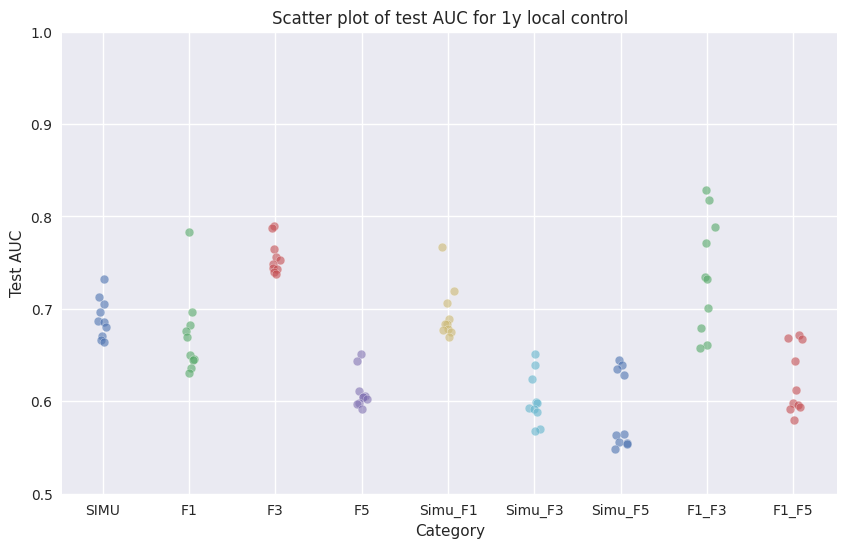

In [19]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
data = analysis_functions.get_top_results_to_plot(top_results)

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of test AUC for 1y local control')
plt.ylim([0.5, 1])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Test AUC')
plt.show()


## Best test brier loss
### Display

In [20]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='test_brier_loss', k = 10)
analysis_functions.print_top_results(top_results, metric='test_brier_loss')

Table: simu_gtv.csv
  Mean test_brier_loss: 0.22, Feature Selection Algorithm: RF, Prediction Algorithm: QDA, Features: ['original_gldm_DependenceNonUniformity', 'original_glcm_JointEntropy'], Parameters: {'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}
  Mean test_brier_loss: 0.222, Feature Selection Algorithm: RF, Prediction Algorithm: QDA, Features: ['original_gldm_DependenceNonUniformity'], Parameters: {'priors': None, 'reg_param': 0.06, 'store_covariance': False, 'tol': 0.0001}
  Mean test_brier_loss: 0.233, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: BAGG, Features: ['original_glcm_JointEntropy', 'original_shape_Maximum2DDiameterRow', 'original_gldm_DependenceNonUniformity'], Parameters: {'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': F

### Scatter plot

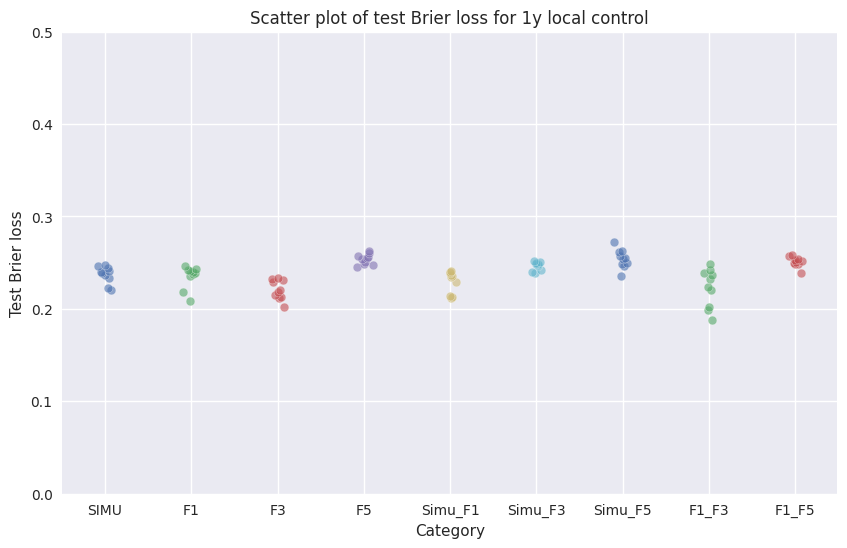

In [21]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
data = analysis_functions.get_top_results_to_plot(top_results)

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of test Brier loss for 1y local control')
plt.ylim([0, 0.5])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Test Brier loss')
plt.show()


## Best spe & sens

In [23]:
analysis_functions.find_perf_alg(results, delta_rad_tables, [outcome], feat_sel_algo_list, pred_algo_list, metric='sens_spec', threshold=0.7)

Table: f1_f3_gtv.csv, Outcome: nine_months_metastatic_status, Feature Selection Algorithm: RF, Prediction Algorithm: ADABOOST, Number of Features: 2, '
'                                           TEST AUC: 0.8292226499635551, Sensitivity: 0.9090909090909081, Specificity: 0.75, '
'                                           Features: ['original_shape_MinorAxisLength', 'original_glszm_GrayLevelNonUniformity']
Table: f1_f3_gtv.csv, Outcome: nine_months_metastatic_status, Feature Selection Algorithm: RF, Prediction Algorithm: KNN, Number of Features: 3, '
'                                           TEST AUC: 0.7320277725370601, Sensitivity: 0.7272727272727271, Specificity: 0.75, '
'                                           Features: ['original_shape_MinorAxisLength', 'original_glszm_GrayLevelNonUniformity', 'original_shape_Maximum2DDiameterColumn']
